In [1]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


# Load Data

In [10]:
train_data = FashionMNIST(root='./Data', download=True, train=True, transform=transforms.ToTensor())
test_data = FashionMNIST(root='./Data', download=True, train=False, transform=transforms.ToTensor())

class_names = train_data.classes

# Create a data loader
train_loader = DataLoader(train_data, batch_size=1, shuffle=False)

# Get Sample Image For Each Class

In [3]:
image_per_class = [[] for _ in range(10)]
for image, label in train_loader:
    if sum(len(item) for item in image_per_class) == 50:
        break
    if len(image_per_class[label])<5:
        image_per_class[label].append(image)

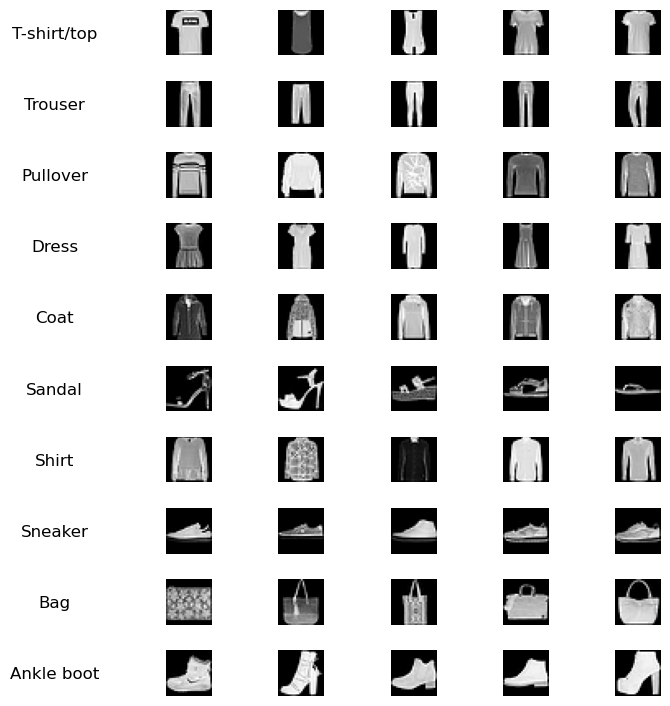

In [4]:
fig = plt.figure(figsize=(7,7))

subfigs = fig.subfigures(nrows=10, ncols=1, wspace=0.1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'{class_names[row]}', y=0.6, x=0)

    axs = subfig.subplots(nrows=1, ncols=5, sharey=True)
    for col, ax in enumerate(axs):
        ax.imshow(image_per_class[row][col].squeeze(0).permute([1,2,0]), cmap='gray')
        ax.axis('off')
        
plt.show()

# Class Distribution

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data.data, train_data.targets, test_size = 5000, stratify = train_data.targets, random_state = 10)
X_test, y_test = test_data.data, test_data.targets

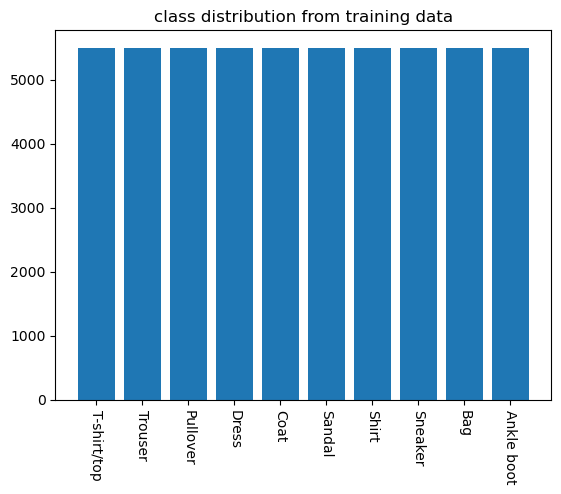

In [8]:
values, counts = y_train.unique(return_counts=True)
plt.bar(values, counts)
plt.xticks(values, class_names, rotation = -90)
plt.title("class distribution from training data")
plt.savefig("Data/Images/class_distribution/train_dist.png")
plt.show()

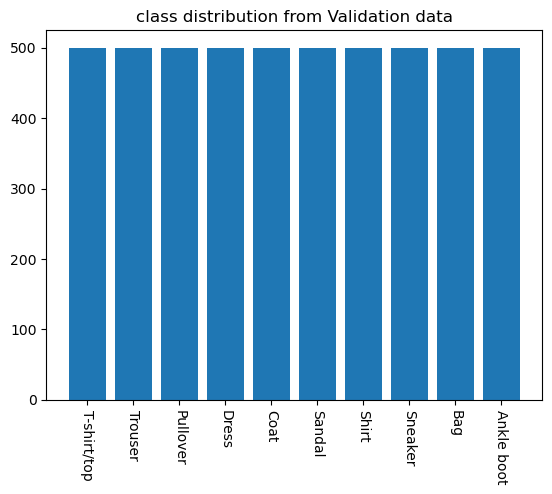

In [9]:
values, counts = y_val.unique(return_counts=True)
plt.bar(values, counts)
plt.xticks(values, class_names, rotation = -90)
plt.title("class distribution from Validation data")
plt.savefig("Data/Images/class_distribution/val_dist.png")
plt.show()

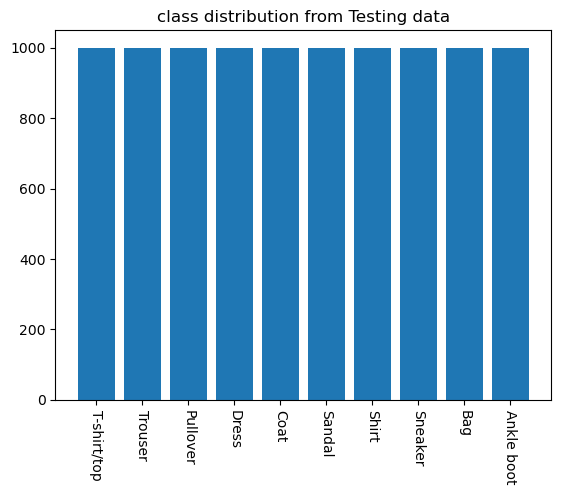

In [12]:
values, counts = y_test.unique(return_counts=True)
plt.bar(values, counts)
plt.xticks(values, class_names, rotation = -90)
plt.title("class distribution from Testing data")
plt.savefig("Data/Images/class_distribution/test_dist.png")
plt.show()

# Feature Subsets

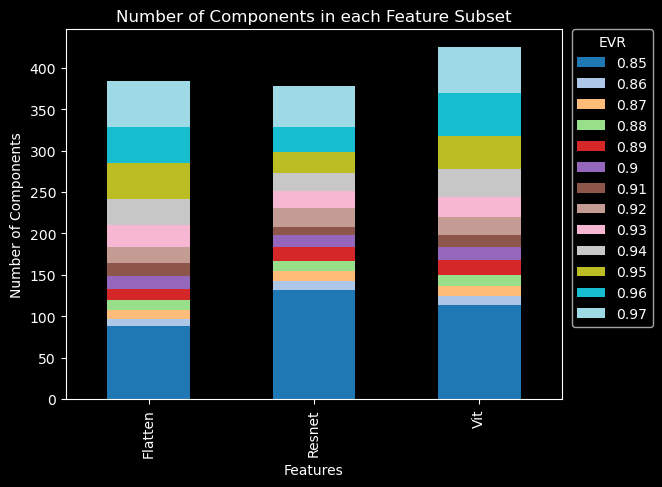

In [68]:
import pandas as pd

evs = np.arange(0.85, 0.98, 0.01)
# x = ['Flatten', 'Resnet', 'Vit']
flatten_components = [88, 97, 108, 119, 133, 149, 164, 184, 210, 242, 285, 328, 384]
resnet_components = [132, 142, 155, 167, 184, 198, 208, 231, 251, 273, 298, 328, 378]
vit_components = [114, 124, 136, 150, 168, 184, 198, 220, 244, 278, 317, 369, 425]

y = np.zeros((len(evs), 3))
temp = list(zip(flatten_components, resnet_components, vit_components))
for i in range(len(temp)):
    if i == 0:
        y[i] = np.array(temp[i])
        continue
    y[i] = np.array(temp[i])-np.array(temp[i-1])

df = pd.DataFrame([['Flatten', *y[:,0]], ['Resnet', *y[:,1]], ['Vit', *y[:,2]]], columns=['Features']+[round(item, 2) for item in list(evs)])
df.plot(x='Features', kind='bar', stacked=True, title='Number of Components in each Feature Subset', colormap="tab20", ylabel='Number of Components')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'EVR')
plt.show()